In [432]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I  print it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms

In [433]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
#from xgboost import XGBClassifier
#from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import Pipeline, make_pipeline

# Libraries to tune model, get different metric scores, and split data
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

# Library to build a logistic regression model
from sklearn.linear_model import LogisticRegression

# Library to impute missing values if is necessary
#from sklearn.impute import KNNImputer

In [434]:
# Library to supress the warning
import warnings
warnings.filterwarnings('ignore')

In [435]:
#Loading dataset
data = pd.read_csv('Train_set (1).csv')

In [436]:
df = pd.read_csv("Train_set (1).csv")
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string

np.random.seed(1)  # To get the same random results every time
df.sample(n=10)

There are 93174 rows and 23 columns.


,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
55354,6049113,15000,3 years,12.12,B,B3,10+ years,MORTGAGE,78000.0,Not Verified,credit_card,TX,23.78,0.0,0.0,35809,26.0,2438.72,INDIVIDUAL,92.0,167969.0,57300.0,1
37647,66433740,12000,3 years,6.89,A,A3,<5 Years,RENT,70000.0,Verified,debt_consolidation,CA,14.08,0.0,0.0,2292,18.0,192.31,INDIVIDUAL,13.0,61657.0,13900.0,0
85499,55487146,8000,3 years,12.69,C,C2,<5 Years,RENT,41000.0,Not Verified,credit_card,AZ,28.22,0.0,0.0,5344,17.0,546.38,INDIVIDUAL,31.0,56179.0,11400.0,0
4187,59689149,20575,5 years,15.61,D,D1,<5 Years,MORTGAGE,78000.0,Source Verified,debt_consolidation,TX,18.00,0.0,0.0,15394,17.0,1542.68,INDIVIDUAL,26.0,32137.0,37100.0,0
19181,72529069,12000,5 years,16.99,D,D3,10+ years,OWN,99000.0,Not Verified,credit_card,CA,25.76,0.0,0.0,38342,20.0,0.00,INDIVIDUAL,NaN,410643.0,44000.0,0
21846,7107907,24000,5 years,22.47,E,E5,10+ years,RENT,105250.0,Verified,debt_consolidation,CA,10.65,0.0,0.0,21455,38.0,11613.17,INDIVIDUAL,135.0,79209.0,34600.0,0
14616,36956310,15000,5 years,14.31,C,C4,10+ years,RENT,80000.0,Verified,credit_card,MA,2.57,2.0,0.0,6043,10.0,2295.83,INDIVIDUAL,61.0,229731.0,10300.0,0
67075,66045939,4000,3 years,9.99,B,B3,<5 Years,MORTGAGE,70720.0,Source Verified,debt_consolidation,MD,13.49,3.0,0.0,6374,26.0,71.35,INDIVIDUAL,13.0,278326.0,7300.0,0
38410,26297747,2500,3 years,9.17,B,B1,10+ years,MORTGAGE,96000.0,Source Verified,other,NC,17.64,0.0,0.0,14990,26.0,259.32,INDIVIDUAL,74.0,116035.0,16000.0,0
36259,59793217,12000,5 years,9.99,B,B3,10+ years,RENT,105000.0,Not Verified,debt_consolidation,NJ,12.26,0.0,1.0,9367,26.0,479.83,INDIVIDUAL,22.0,22875.0,22900.0,0


In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93174 entries, 0 to 93173
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          93174 non-null  int64  
 1   loan_amnt                   93174 non-null  int64  
 2   loan_term                   93174 non-null  object 
 3   interest_rate               93174 non-null  float64
 4   loan_grade                  93174 non-null  object 
 5   loan_subgrade               93174 non-null  object 
 6   job_experience              88472 non-null  object 
 7   home_ownership              93174 non-null  object 
 8   annual_income               93173 non-null  float64
 9   income_verification_status  93174 non-null  object 
 10  loan_purpose                93174 non-null  object 
 11  state_code                  93174 non-null  object 
 12  debt_to_income              93174 non-null  float64
 13  delinq_2yrs                 931

In [438]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,93174.0,3.505021e+07,2.414926e+07,70735.00,10859832.50,3.710751e+07,5.859895e+07,73519746.00
loan_amnt,93174.0,1.473386e+04,8.428185e+03,500.00,8000.00,1.300000e+04,2.000000e+04,35000.00
interest_rate,93174.0,1.323343e+01,4.368728e+00,5.32,9.99,1.299000e+01,1.620000e+01,28.99
annual_income,93173.0,7.502826e+04,6.945478e+04,1200.00,45000.00,6.400000e+04,9.000000e+04,9500000.00
debt_to_income,93174.0,1.812762e+01,8.563084e+00,0.00,11.93,1.764000e+01,2.389000e+01,672.52
delinq_2yrs,93172.0,3.169944e-01,8.808591e-01,0.00,0.00,0.000000e+00,0.000000e+00,22.00
public_records,93172.0,1.961212e-01,5.811882e-01,0.00,0.00,0.000000e+00,0.000000e+00,49.00
revolving_balance,93174.0,1.685447e+04,2.368907e+04,0.00,6433.00,1.185600e+04,2.074500e+04,2560703.00
total_acc,93172.0,2.524891e+01,1.185506e+01,1.00,17.00,2.400000e+01,3.200000e+01,119.00
interest_receive,93174.0,1.747264e+03,2.088236e+03,0.00,439.88,1.070755e+03,2.219613e+03,23172.31


In [439]:
df.isna().sum()

ID                               0
loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                4702
home_ownership                   0
annual_income                    1
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      2
public_records                   2
revolving_balance                0
total_acc                        2
interest_receive                 0
application_type                 0
last_week_pay                 1924
total_current_balance         7386
total_revolving_limit         7386
default                          0
dtype: int64

In [440]:
## Replacing missing values with mean
df['total_current_balance'].fillna(df.total_current_balance.mean(), inplace = True)
df['total_revolving_limit'].fillna(df.total_revolving_limit.mean(), inplace = True)

In [441]:
## Replacing missing values with median
df['last_week_pay'].fillna(df.last_week_pay.median(), inplace = True)

In [442]:
## Replacing string with unknown
df.fillna({"job_experience": "unknown", "type": ""})

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,72199369,9000,3 years,9.17,B,B2,<5 Years,OWN,85000.0,Not Verified,debt_consolidation,NC,26.68,0.0,0.0,39519,20.0,59.60,INDIVIDUAL,4.0,95493.000000,84100.000000,0
1,14257956,18000,3 years,13.65,C,C1,<5 Years,OWN,64000.0,Verified,debt_consolidation,SC,31.67,0.0,1.0,9783,24.0,3348.25,INDIVIDUAL,95.0,185433.000000,13500.000000,0
2,66216451,16000,3 years,7.26,A,A4,<5 Years,MORTGAGE,150000.0,Source Verified,debt_consolidation,TX,19.70,2.0,0.0,13641,27.0,276.69,INDIVIDUAL,13.0,180519.000000,19300.000000,0
3,46974169,25000,3 years,13.99,C,C4,unknown,MORTGAGE,59800.0,Verified,debt_consolidation,MO,37.39,0.0,0.0,35020,35.0,1106.72,INDIVIDUAL,17.0,183208.000000,55400.000000,0
4,46725961,17000,3 years,6.39,A,A2,10+ years,MORTGAGE,72000.0,Source Verified,credit_card,TX,8.92,0.0,0.0,23990,26.0,725.29,INDIVIDUAL,39.0,23990.000000,81300.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93169,65577252,3200,3 years,7.26,A,A4,<5 Years,RENT,85000.0,Not Verified,debt_consolidation,FL,17.11,0.0,0.0,7924,38.0,55.34,INDIVIDUAL,13.0,64635.000000,47600.000000,0
93170,836021,3500,3 years,5.42,A,A1,unknown,MORTGAGE,57550.0,Not Verified,other,FL,22.64,0.0,0.0,10174,24.0,299.67,INDIVIDUAL,161.0,139252.923288,32085.902889,1
93171,33058720,8000,3 years,13.98,C,C3,10+ years,RENT,148531.5,Source Verified,credit_card,AK,13.04,1.0,0.0,5391,25.0,1150.58,INDIVIDUAL,65.0,94596.000000,6500.000000,0
93172,4060472,35000,3 years,17.77,D,D1,<5 Years,RENT,100000.0,Verified,debt_consolidation,CA,17.22,0.0,0.0,24609,45.0,5764.58,INDIVIDUAL,56.0,33759.000000,34900.000000,1


In [443]:
conditions = [
    (df["job_experience"] == 'unknown')
    ]
values = ['<5 Years']
df["job_experience"] = np.select(conditions, values)
print(df.job_experience.value_counts())

0    93174
Name: job_experience, dtype: int64


In [444]:
### Droping rows with missing values 
df.dropna(subset = ["annual_income"], inplace=True)
df.dropna(subset = ["delinq_2yrs"], inplace=True)
df.dropna(subset = ["public_records"], inplace=True)
df.dropna(subset = ["total_acc"], inplace=True)

In [445]:
df.isna().sum()

ID                            0
loan_amnt                     0
loan_term                     0
interest_rate                 0
loan_grade                    0
loan_subgrade                 0
job_experience                0
home_ownership                0
annual_income                 0
income_verification_status    0
loan_purpose                  0
state_code                    0
debt_to_income                0
delinq_2yrs                   0
public_records                0
revolving_balance             0
total_acc                     0
interest_receive              0
application_type              0
last_week_pay                 0
total_current_balance         0
total_revolving_limit         0
default                       0
dtype: int64

In [446]:
cols = df.select_dtypes(['object'])
cols.columns

Index(['loan_term', 'loan_grade', 'loan_subgrade', 'job_experience',
       'home_ownership', 'income_verification_status', 'loan_purpose',
       'state_code', 'application_type'],
      dtype='object')

In [447]:
for i in cols.columns:
    df[i] = df[i].astype('category')

In [448]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93172 entries, 0 to 93173
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          93172 non-null  int64   
 1   loan_amnt                   93172 non-null  int64   
 2   loan_term                   93172 non-null  category
 3   interest_rate               93172 non-null  float64 
 4   loan_grade                  93172 non-null  category
 5   loan_subgrade               93172 non-null  category
 6   job_experience              93172 non-null  category
 7   home_ownership              93172 non-null  category
 8   annual_income               93172 non-null  float64 
 9   income_verification_status  93172 non-null  category
 10  loan_purpose                93172 non-null  category
 11  state_code                  93172 non-null  category
 12  debt_to_income              93172 non-null  float64 
 13  delinq_2yrs     

In [449]:
# Making a list of all categorical variables
cat_col = [
    "loan_term",
    "loan_grade",
    "loan_subgrade",
    "job_experience",
    "home_ownership",
    "income_verification_status",
    "loan_purpose",
    "state_code",
    "application_type",
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 40)

3 years    65211
5 years    27963
Name: loan_term, dtype: int64
----------------------------------------
B    26865
C    25787
A    15534
D    14715
E     7378
F     2344
G      551
Name: loan_grade, dtype: int64
----------------------------------------
B3    5879
B4    5879
C2    5479
C1    5443
C3    5270
C4    5182
B2    5169
B5    5095
B1    4843
A5    4723
C5    4413
D1    3716
A4    3631
D2    3239
D3    2759
D4    2717
A3    2450
A1    2377
A2    2353
D5    2284
E1    1924
E2    1736
E3    1513
E4    1228
E5     977
F1     745
F2     545
F3     465
F4     355
F5     234
G1     174
G2     146
G3     105
G5      66
G4      60
Name: loan_subgrade, dtype: int64
----------------------------------------
<5 Years      40610
10+ years     30362
6-10 years    17500
Name: job_experience, dtype: int64
----------------------------------------
MORTGAGE    46445
RENT        37449
OWN          9254
OTHER          18
NONE            8
Name: home_ownership, dtype: int64
-------------------------

In [450]:
conditions = [
    (df["income_verification_status"] == 'Source Verified'),
    (df["income_verification_status"] == 'Verified'),
    (df["income_verification_status"] == 'Not Verified'),
    ]
values = ['Verified', 'Verified', 'Not Verified']
df["income_verification_status"] = np.select(conditions, values)
print(df.income_verification_status.value_counts())

Verified        64937
Not Verified    28235
Name: income_verification_status, dtype: int64


### Small EDA - just knowing the data

In [219]:
#Building boxplot and histogram for any input numerical variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

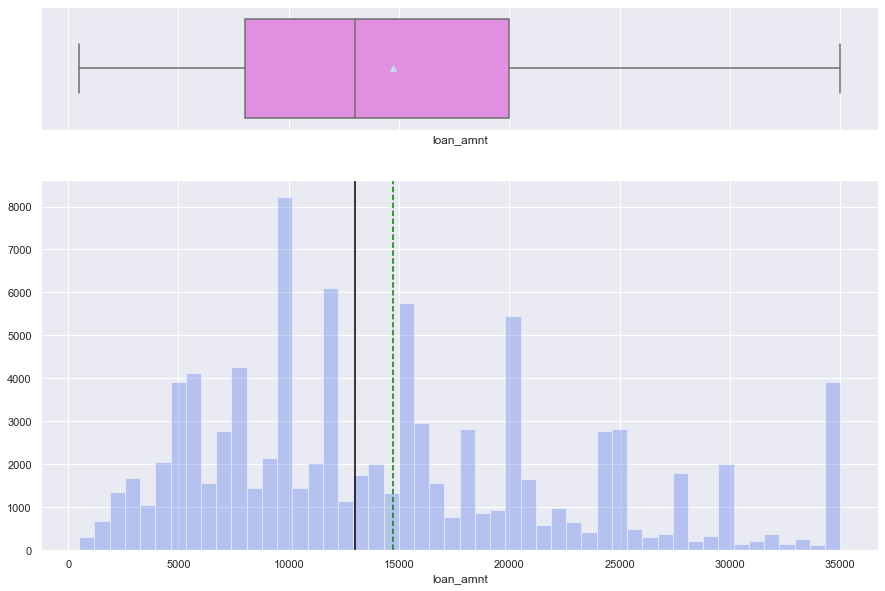

In [220]:
# Observations on Months on the book
histogram_boxplot(df['loan_amnt'])

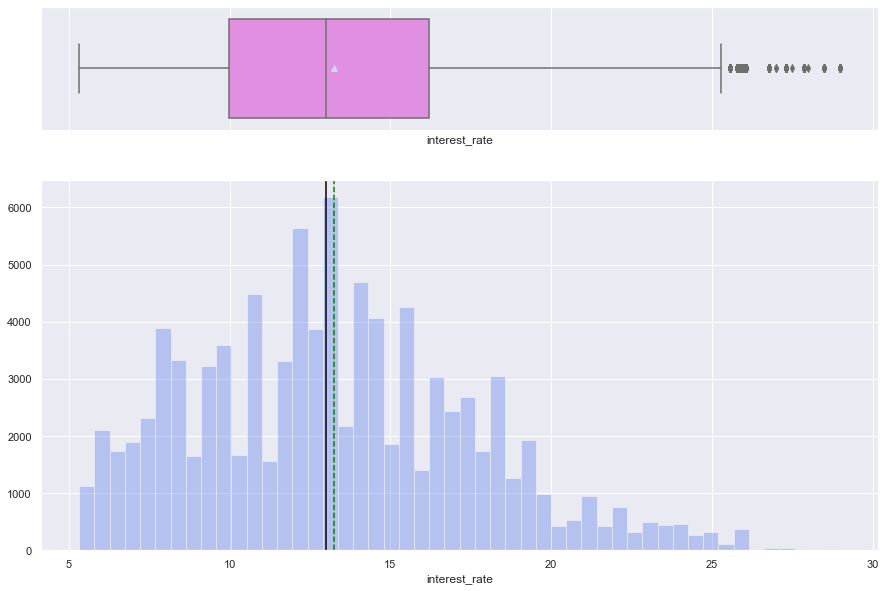

In [221]:
# Observations on Months on the book
histogram_boxplot(df['interest_rate'])

In [222]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

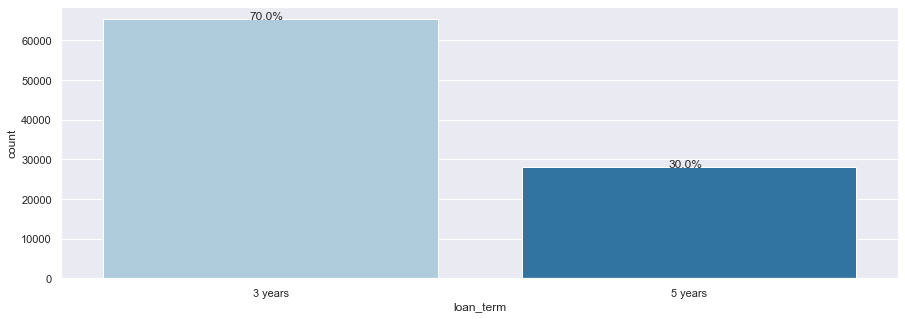

In [223]:
perc_on_bar('loan_term')

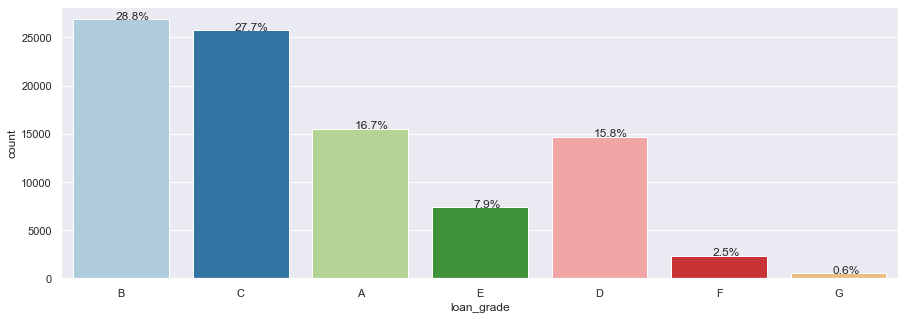

In [224]:
perc_on_bar('loan_grade')

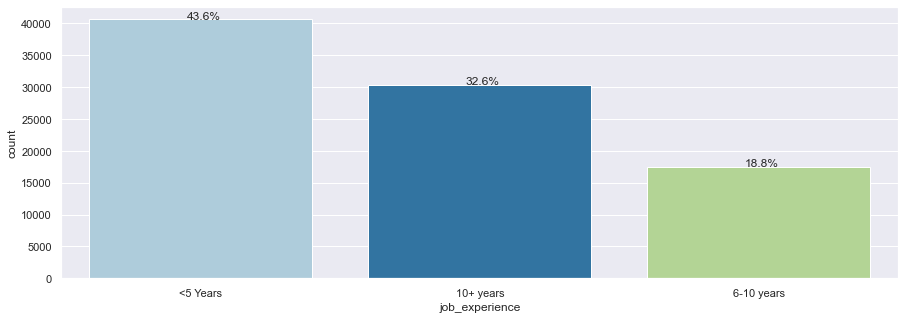

In [225]:
perc_on_bar('job_experience')

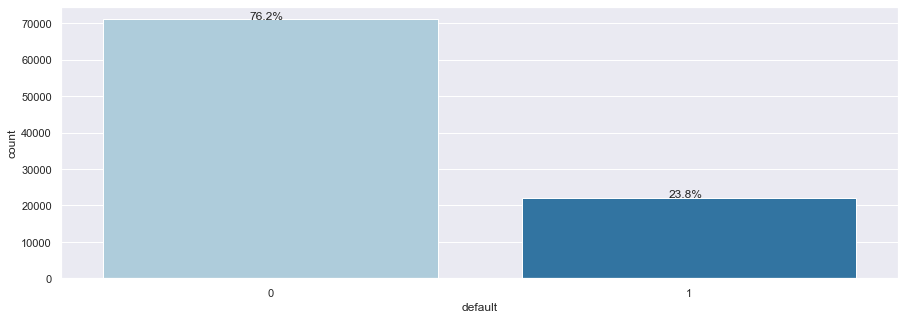

In [226]:
perc_on_bar('default')

In [227]:
## Function to plot stacked bar chart
# The intention is to verify the correlation between the population that purchased any package with all other values
def stacked_plot(x):
    sns.set(palette='coolwarm')
    tab1 = pd.crosstab(x,df['default'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['default'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    #plt.legend(loc='lower left', frameon=False)
    #plt.legend(loc="upper left", bbox_to_anchor=(0,1))
    plt.show()

default        0      1    All
loan_term                     
3 years    47345  17864  65209
5 years    23700   4263  27963
All        71045  22127  93172
------------------------------------------------------------------------------------------------------------------------


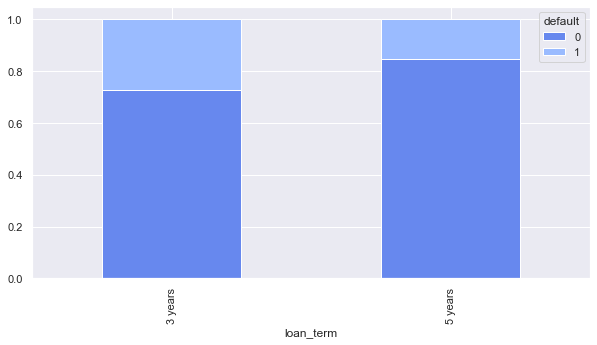

In [228]:
stacked_plot(df['loan_term'])

default         0      1    All
loan_grade                     
A           11281   4252  15533
B           19787   7078  26865
C           20203   5583  25786
D           11478   3237  14715
E            6003   1375   7378
F            1862    482   2344
G             431    120    551
All         71045  22127  93172
------------------------------------------------------------------------------------------------------------------------


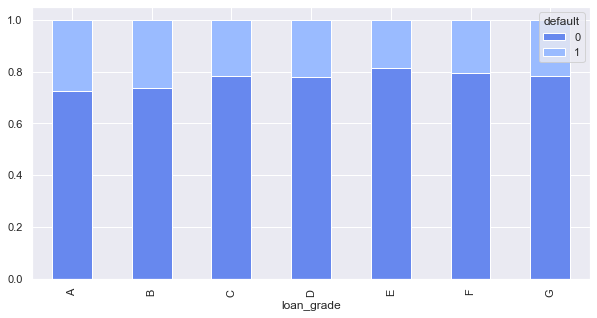

In [229]:
stacked_plot(df['loan_grade'])

default            0      1    All
loan_subgrade                     
A1              1780    597   2377
A2              1710    643   2353
A3              1731    719   2450
A4              2502   1129   3631
A5              3558   1164   4722
B1              3669   1174   4843
B2              3750   1419   5169
B3              4196   1683   5879
B4              4335   1544   5879
B5              3837   1258   5095
C1              4152   1290   5442
C2              4264   1215   5479
C3              4150   1120   5270
C4              4161   1021   5182
C5              3476    937   4413
D1              2932    784   3716
D2              2462    777   3239
D3              2114    645   2759
D4              2154    563   2717
D5              1816    468   2284
E1              1598    326   1924
E2              1436    300   1736
E3              1206    307   1513
E4               996    232   1228
E5               767    210    977
F1               590    155    745
F2               437

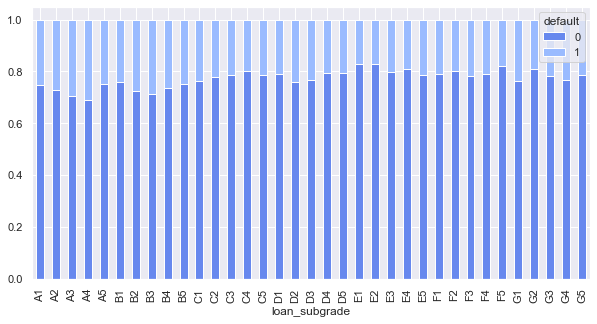

In [230]:
stacked_plot(df['loan_subgrade'])

### Replace Structure

In [451]:
replaceStruct = {
                "job_experience": {"6-10 years":1, "10+ years":2, "<5 Years":3}
                    }
oneHotCols=["loan_term","loan_grade","loan_subgrade","home_ownership","income_verification_status","loan_purpose","state_code",
"application_type"]

In [452]:
df=df.replace(replaceStruct)
df=pd.get_dummies(df, columns=oneHotCols)
df.head(10)

,ID,loan_amnt,interest_rate,job_experience,annual_income,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,last_week_pay,total_current_balance,total_revolving_limit,default,loan_term_3 years,loan_term_5 years,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,loan_subgrade_A1,loan_subgrade_A2,loan_subgrade_A3,loan_subgrade_A4,loan_subgrade_A5,loan_subgrade_B1,loan_subgrade_B2,loan_subgrade_B3,loan_subgrade_B4,loan_subgrade_B5,loan_subgrade_C1,loan_subgrade_C2,loan_subgrade_C3,loan_subgrade_C4,loan_subgrade_C5,loan_subgrade_D1,loan_subgrade_D2,loan_subgrade_D3,loan_subgrade_D4,loan_subgrade_D5,loan_subgrade_E1,loan_subgrade_E2,loan_subgrade_E3,loan_subgrade_E4,loan_subgrade_E5,loan_subgrade_F1,loan_subgrade_F2,loan_subgrade_F3,loan_subgrade_F4,loan_subgrade_F5,loan_subgrade_G1,loan_subgrade_G2,loan_subgrade_G3,loan_subgrade_G4,loan_subgrade_G5,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,income_verification_status_Not Verified,income_verification_status_Verified,loan_purpose_credit_card,loan_purpose_debt_consolidation,loan_purpose_home_improvement,loan_purpose_other,state_code_AK,state_code_AL,state_code_AR,state_code_AZ,state_code_CA,state_code_CO,state_code_CT,state_code_DC,state_code_DE,state_code_FL,state_code_GA,state_code_HI,state_code_ID,state_code_IL,state_code_IN,state_code_KS,state_code_KY,state_code_LA,state_code_MA,state_code_MD,state_code_ME,state_code_MI,state_code_MN,state_code_MO,state_code_MS,state_code_MT,state_code_NC,state_code_ND,state_code_NE,state_code_NH,state_code_NJ,state_code_NM,state_code_NV,state_code_NY,state_code_OH,state_code_OK,state_code_OR,state_code_PA,state_code_RI,state_code_SC,state_code_SD,state_code_TN,state_code_TX,state_code_UT,state_code_VA,state_code_VT,state_code_WA,state_code_WI,state_code_WV,state_code_WY,application_type_INDIVIDUAL,application_type_JOINT
0,72199369,9000,9.17,0,85000.0,26.68,0.0,0.0,39519,20.0,59.60,4.0,95493.0,84100.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,14257956,18000,13.65,0,64000.0,31.67,0.0,1.0,9783,24.0,3348.25,95.0,185433.0,13500.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,66216451,16000,7.26,0,150000.0,19.70,2.0,0.0,13641,27.0,276.69,13.0,180519.0,19300.0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,46974169,25000,13.99,0,59800.0,37.39,0.0,0.0,35020,35.0,1106.72,17.0,183208.0,55400.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,46725961,17000,6.39,0,72000.0,8.92,0.0,0.0,23990,26.0,725.29,39.0,23990.0,81300.0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
5,56469197,10000,12.69,0,56000.0,16.16,0.0,1.0,6643,48.0,590.50,26.0,24054.0,25167.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,3409695,15000,11.14,0,100000.0,10.51,0.0,1.0,14088,14.0,1020.57,35.0,14519.0,15200.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### Split the data into train and test sets

In [453]:
X = df.drop("default" , axis=1)
y = df.pop("default")

In [454]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

In [455]:
X_train.shape, X_test.shape

((65220, 121), (27952, 121))

### Run Funtions to all Calculations

In [456]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [457]:
##  Function to calculate recall score - Minimize False Positive
def get_recall_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [458]:
##  Function to calculate precision score
def get_precision_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [459]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## START THE DIFFERENT MODELS POSSIBLE 

### Decision Tree

In [240]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.19,1:0.81},random_state=1)

In [241]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, random_state=1)

In [242]:
dtree_acc = get_accuracy_score(dtree)
dtree_recall = get_recall_score(dtree)
dtree_precision = get_precision_score(dtree)

Accuracy on training set :  1.0
Accuracy on test set :  0.870528048082427
Recall on training set :  1.0
Recall on test set :  0.7170834588731546
Precision on training set :  1.0
Precision on test set :  0.7321950469158591


### Bagging

In [243]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [244]:
bagging_acc = get_accuracy_score(bagging)
bagging_recall = get_recall_score(bagging)
bagging_precision = get_precision_score(bagging)

Accuracy on training set :  0.9935295921496473
Accuracy on test set :  0.8974670864338866
Recall on training set :  0.9784363096390987
Recall on test set :  0.7800542332027719
Precision on training set :  0.9942268582300072
Precision on test set :  0.7864520048602673


### Bagging Classifier with weighted decision tree

In [245]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.19,1:0.81},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                      1: 0.81},
                                                        random_state=1),
                  random_state=1)

In [246]:
wt_bagging_acc = get_accuracy_score(bagging_wt)
wt_bagging_recall = get_recall_score(bagging_wt)
wt_bagging_precision = get_precision_score(bagging_wt)

Accuracy on training set :  0.9932996013492794
Accuracy on test set :  0.897359759587865
Recall on training set :  0.9781780618503454
Recall on test set :  0.7735763784272371
Precision on training set :  0.9935081967213115
Precision on test set :  0.7898784802338101


### Random Forest

In [485]:
#Train the random forest classifier
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [486]:
rf_acc = get_accuracy_score(rf)
rf_recall = get_recall_score(rf)
rf_precision = get_precision_score(rf)

Accuracy on training set :  0.9999846672799755
Accuracy on test set :  0.8662349742415569
Recall on training set :  0.9999354380528117
Recall on test set :  0.5692979813196746
Precision on training set :  1.0
Precision on test set :  0.811118265722258


### Random forest with class weights

In [251]:
rf_wt = RandomForestClassifier(class_weight={0:0.19,1:0.81}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, random_state=1)

In [252]:
wt_rf_acc = get_accuracy_score(rf_wt)
wt_rf_recall = get_recall_score(rf_wt)
wt_rf_precision = get_precision_score(rf_wt)

Accuracy on training set :  0.999969334559951
Accuracy on test set :  0.8706711505437894
Recall on training set :  0.9998708761056233
Recall on test set :  0.5848147032238626
Precision on training set :  1.0
Precision on test set :  0.8188145960767771


### AdaBoost Classifier

In [460]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [461]:
ab_classifier_acc = get_accuracy_score(ab_classifier)
ab_classifier_recall = get_recall_score(ab_classifier)
ab_classifier_precision = get_precision_score(ab_classifier)

Accuracy on training set :  0.8593222937749156
Accuracy on test set :  0.8535704064109902
Recall on training set :  0.5375427722900122
Recall on test set :  0.5210906899668575
Precision on training set :  0.8053782162894176
Precision on test set :  0.7909901669334553


### Gradient Boosting Classifier

In [259]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [260]:
gb_classifier_acc = get_accuracy_score(gb_classifier)
gb_classifier_recall = get_recall_score(gb_classifier)
gb_classifier_precision = get_precision_score(gb_classifier)

Accuracy on training set :  0.8930696105489114
Accuracy on test set :  0.8857684602175158
Recall on training set :  0.722577312931758
Recall on test set :  0.7015667369689665
Precision on training set :  0.8069795947797246
Precision on test set :  0.7934912250809337


### XGBoost Classifier

In [262]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1)
xgb_classifier.fit(X_train,y_train)

NameError: name 'XGBClassifier' is not defined

## LETS TUNING THE NEST MODELS 

### Lets choose the best 20Models to Tunning:
#### > Bagging Classifier
#### > Random forest 


### Randomized Search CV

In [482]:
from sklearn.model_selection import RandomizedSearchCV

### Tunning Bagging Classifier - RandomizedSearchCV

In [265]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), BaggingClassifier(random_state=1))

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
              'baggingclassifier__max_samples': [0.7,0.8,0.9,1], 
              'baggingclassifier__max_features': [0.7,0.8,0.9,1],
              'baggingclassifier__n_estimators' : [10,20,30,40,50],
    
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
bcg_tuned2 = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
bcg_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(bcg_tuned2.best_params_,bcg_tuned2.best_score_))

Best parameters are {'baggingclassifier__n_estimators': 50, 'baggingclassifier__max_samples': 0.7, 'baggingclassifier__max_features': 0.9} with CV score=0.7917880503696595:
Wall time: 44min 2s


In [266]:
# Creating new pipeline with best parameters
bcg_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "BCG",
            BaggingClassifier(
                max_samples=0.7,
                n_estimators=50,
                max_features=0.8,
 
            ),
        ),
    ]
)
# Fit the model on training data
bcg_tuned2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('BCG',
                 BaggingClassifier(max_features=0.8, max_samples=0.7,
                                   n_estimators=50))])

In [267]:
bg_randomizedSearchCV_acc = get_accuracy_score(bcg_tuned2)
bg_randomizedSearchCV_acc = get_recall_score(bcg_tuned2)
bg_randomizedSearchCV_accon = get_precision_score(bcg_tuned2)

Accuracy on training set :  0.9952008586323213
Accuracy on test set :  0.8979321694333142
Recall on training set :  0.9830847698366583
Recall on test set :  0.759114191021392
Precision on training set :  0.9966618667364838
Precision on test set :  0.80073097092007


### Tuning Random Forest - RandomizedSearchCV

In [493]:
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [110,251,501],
        "min_samples_leaf": np.arange(1, 6,1),
        "max_features": [0.7,0.9,"log2","auto"],
        #"max_samples": [0.7,0.9,None],
}


# Run the grid search
rand_obj =  RandomizedSearchCV(rf_estimator, parameters, scoring='recall',cv=5)
rand_obj = rand_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = rand_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_features=0.9, min_samples_leaf=4, n_estimators=501,
                       random_state=1)

In [494]:
tuned_rf_acc = get_accuracy_score(rf_estimator)
tuned_rf_recall = get_recall_score(rf_estimator)
tuned_rf_precision = get_precision_score(rf_estimator)

Accuracy on training set :  0.973934375958295
Accuracy on test set :  0.9081639954207212
Recall on training set :  0.943185486474272
Recall on test set :  0.8662247664959325
Precision on training set :  0.9468533281482922
Precision on test set :  0.7739938080495357


### Preparing dataset TEST_SET.CSV

In [462]:
datatest = pd.read_csv('Test_set.csv')

In [463]:
datatest.head(5)

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit
0,4855329,12000,3 years,15.31,C,C2,<5 Years,MORTGAGE,73400.0,Not Verified,debt_consolidation,CA,14.62,0.0,0.0,22156,30.0,2290.24,INDIVIDUAL,87.0,128098.0,25800.0
1,66862420,12000,3 years,7.26,A,A4,10+ years,MORTGAGE,105000.0,Not Verified,credit_card,VA,11.38,0.0,0.0,7592,14.0,202.68,INDIVIDUAL,13.0,269396.0,23600.0
2,3637416,15000,3 years,14.33,C,C1,6-10 years,MORTGAGE,50000.0,Verified,debt_consolidation,TX,28.15,0.0,1.0,17983,19.0,1166.24,INDIVIDUAL,30.0,220135.0,34100.0
3,53682249,12000,3 years,9.99,B,B3,6-10 years,RENT,37000.0,Source Verified,credit_card,NJ,34.32,0.0,0.0,12262,18.0,635.06,INDIVIDUAL,35.0,39436.0,21700.0
4,53937165,20150,3 years,11.53,B,B5,<5 Years,RENT,75000.0,Source Verified,debt_consolidation,CA,26.74,1.0,0.0,8251,11.0,1232.84,INDIVIDUAL,31.0,52764.0,12000.0


In [464]:
datatest.isna().sum()

ID                               0
loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                2089
home_ownership                   0
annual_income                    0
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      1
public_records                   1
revolving_balance                0
total_acc                        1
interest_receive                 0
application_type                 0
last_week_pay                  806
total_current_balance         3230
total_revolving_limit         3230
dtype: int64

In [465]:
conditions = [
    (datatest["income_verification_status"] == 'Source Verified'),
    (datatest["income_verification_status"] == 'Verified'),
    (datatest["income_verification_status"] == 'Not Verified'),
    ]
values = ['Verified', 'Verified', 'Not Verified']
datatest["income_verification_status"] = np.select(conditions, values)
print(datatest.income_verification_status.value_counts())

Verified        27975
Not Verified    11958
Name: income_verification_status, dtype: int64


In [466]:
## Replacing missing values with mean
datatest['total_current_balance'].fillna(datatest.total_current_balance.mean(), inplace = True)
datatest['total_revolving_limit'].fillna(datatest.total_revolving_limit.mean(), inplace = True)

In [467]:
## Replacing missing values with median
datatest['last_week_pay'].fillna(datatest.last_week_pay.median(), inplace = True)

In [468]:
datatest['delinq_2yrs'].fillna(datatest.delinq_2yrs.mean(), inplace = True)
datatest['public_records'].fillna(datatest.public_records.mean(), inplace = True)
datatest['total_acc'].fillna(datatest.total_acc.mean(), inplace = True)                                

In [469]:
## Replacing string with unknown
datatest.fillna({"job_experience": "unknown", "type": ""})

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit
0,4855329,12000,3 years,15.31,C,C2,<5 Years,MORTGAGE,73400.0,Not Verified,debt_consolidation,CA,14.62,0.0,0.0,22156,30.0,2290.24,INDIVIDUAL,87.0,128098.0,25800.0
1,66862420,12000,3 years,7.26,A,A4,10+ years,MORTGAGE,105000.0,Not Verified,credit_card,VA,11.38,0.0,0.0,7592,14.0,202.68,INDIVIDUAL,13.0,269396.0,23600.0
2,3637416,15000,3 years,14.33,C,C1,6-10 years,MORTGAGE,50000.0,Verified,debt_consolidation,TX,28.15,0.0,1.0,17983,19.0,1166.24,INDIVIDUAL,30.0,220135.0,34100.0
3,53682249,12000,3 years,9.99,B,B3,6-10 years,RENT,37000.0,Verified,credit_card,NJ,34.32,0.0,0.0,12262,18.0,635.06,INDIVIDUAL,35.0,39436.0,21700.0
4,53937165,20150,3 years,11.53,B,B5,<5 Years,RENT,75000.0,Verified,debt_consolidation,CA,26.74,1.0,0.0,8251,11.0,1232.84,INDIVIDUAL,31.0,52764.0,12000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39928,57779318,5000,3 years,8.18,B,B1,10+ years,MORTGAGE,65000.0,Verified,home_improvement,MI,13.09,0.0,5.0,6731,24.0,187.27,INDIVIDUAL,26.0,14422.0,26100.0
39929,59742362,1800,3 years,11.53,B,B5,6-10 years,MORTGAGE,55000.0,Verified,home_improvement,AZ,25.44,0.0,1.0,11092,38.0,81.24,INDIVIDUAL,26.0,243469.0,29200.0
39930,72657145,15200,3 years,13.44,C,C3,10+ years,MORTGAGE,78000.0,Not Verified,credit_card,TX,19.40,0.0,0.0,19688,26.0,0.00,INDIVIDUAL,48.0,145370.0,45400.0
39931,15220189,14425,5 years,18.92,D,D4,<5 Years,MORTGAGE,38000.0,Not Verified,credit_card,IN,17.40,0.0,1.0,10805,29.0,4268.80,INDIVIDUAL,96.0,106449.0,19700.0


In [470]:
cols = datatest.select_dtypes(['object'])
cols.columns

Index(['loan_term', 'loan_grade', 'loan_subgrade', 'job_experience',
       'home_ownership', 'income_verification_status', 'loan_purpose',
       'state_code', 'application_type'],
      dtype='object')

In [471]:
for i in cols.columns:
    datatest[i] = datatest[i].astype('category')

In [472]:
datatest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39933 entries, 0 to 39932
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          39933 non-null  int64   
 1   loan_amnt                   39933 non-null  int64   
 2   loan_term                   39933 non-null  category
 3   interest_rate               39933 non-null  float64 
 4   loan_grade                  39933 non-null  category
 5   loan_subgrade               39933 non-null  category
 6   job_experience              37844 non-null  category
 7   home_ownership              39933 non-null  category
 8   annual_income               39933 non-null  float64 
 9   income_verification_status  39933 non-null  category
 10  loan_purpose                39933 non-null  category
 11  state_code                  39933 non-null  category
 12  debt_to_income              39933 non-null  float64 
 13  delinq_2yrs     

In [473]:
conditions = [
    (datatest["job_experience"] == 'unknown')
    ]
values = ['<5 Years']
datatest["job_experience"] = np.select(conditions, values)
print(datatest.job_experience.value_counts())

0    39933
Name: job_experience, dtype: int64


In [474]:
replaceStruct = {
                "job_experience": {"6-10 years":1, "10+ years":2, "<5 Years":3}
                    }
oneHotCols=["loan_term","loan_grade","loan_subgrade","home_ownership","income_verification_status","loan_purpose","state_code",
"application_type"]

In [475]:
datatest=datatest.replace(replaceStruct)
datatest=pd.get_dummies(datatest, columns=oneHotCols)
datatest.head(10)

,ID,loan_amnt,interest_rate,job_experience,annual_income,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,last_week_pay,total_current_balance,total_revolving_limit,loan_term_3 years,loan_term_5 years,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,loan_subgrade_A1,loan_subgrade_A2,loan_subgrade_A3,loan_subgrade_A4,loan_subgrade_A5,loan_subgrade_B1,loan_subgrade_B2,loan_subgrade_B3,loan_subgrade_B4,loan_subgrade_B5,loan_subgrade_C1,loan_subgrade_C2,loan_subgrade_C3,loan_subgrade_C4,loan_subgrade_C5,loan_subgrade_D1,loan_subgrade_D2,loan_subgrade_D3,loan_subgrade_D4,loan_subgrade_D5,loan_subgrade_E1,loan_subgrade_E2,loan_subgrade_E3,loan_subgrade_E4,loan_subgrade_E5,loan_subgrade_F1,loan_subgrade_F2,loan_subgrade_F3,loan_subgrade_F4,loan_subgrade_F5,loan_subgrade_G1,loan_subgrade_G2,loan_subgrade_G3,loan_subgrade_G4,loan_subgrade_G5,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,income_verification_status_Not Verified,income_verification_status_Verified,loan_purpose_credit_card,loan_purpose_debt_consolidation,loan_purpose_home_improvement,loan_purpose_other,state_code_AK,state_code_AL,state_code_AR,state_code_AZ,state_code_CA,state_code_CO,state_code_CT,state_code_DC,state_code_DE,state_code_FL,state_code_GA,state_code_HI,state_code_ID,state_code_IL,state_code_IN,state_code_KS,state_code_KY,state_code_LA,state_code_MA,state_code_MD,state_code_ME,state_code_MI,state_code_MN,state_code_MO,state_code_MS,state_code_MT,state_code_NC,state_code_ND,state_code_NE,state_code_NH,state_code_NJ,state_code_NM,state_code_NV,state_code_NY,state_code_OH,state_code_OK,state_code_OR,state_code_PA,state_code_RI,state_code_SC,state_code_SD,state_code_TN,state_code_TX,state_code_UT,state_code_VA,state_code_VT,state_code_WA,state_code_WI,state_code_WV,state_code_WY,application_type_INDIVIDUAL,application_type_JOINT
0,4855329,12000,15.31,0,73400.0,14.62,0.0,0.0,22156,30.0,2290.24,87.0,128098.000000,25800.000000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,66862420,12000,7.26,0,105000.0,11.38,0.0,0.0,7592,14.0,202.68,13.0,269396.000000,23600.000000,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,3637416,15000,14.33,0,50000.0,28.15,0.0,1.0,17983,19.0,1166.24,30.0,220135.000000,34100.000000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,53682249,12000,9.99,0,37000.0,34.32,0.0,0.0,12262,18.0,635.06,35.0,39436.000000,21700.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,53937165,20150,11.53,0,75000.0,26.74,1.0,0.0,8251,11.0,1232.84,31.0,52764.000000,12000.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,1464149,5850,12.12,0,72000.0,23.14,0.0,0.0,16554,20.0,1155.78,156.0,140462.513609,32453.212762,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,7429943,18000,20.80,0,45000.0,8.17,0.0,0.0,12282,19.0,2409.02,35.0,12282.000000,45752.000000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,

In [476]:
datatest.shape

(39933, 121)

### Apply the Bagging Model Predict

In [412]:
y_pred = bagging.predict(datatest)
prediction = [round(value) for value in y_pred]

In [413]:
datatest2 = pd.DataFrame(prediction, columns=['Default'])

In [414]:
print(datatest2)

       Default
0            1
1            0
2            0
3            0
4            0
...        ...
39928        0
39929        0
39930        0
39931        0
39932        0

[39933 rows x 1 columns]


In [415]:
result = pd.concat([datatest, datatest2], axis=1)

In [416]:
result.to_csv("/Users/alisantos/Downloads/Test_set_Bagging.csv")

### Apply the Bagging Classifier with weighted decision tree Predict

In [417]:
y_pred = bagging_wt.predict(datatest)
prediction = [round(value) for value in y_pred]

In [418]:
datatest3 = pd.DataFrame(prediction, columns=['Default'])

In [419]:
print(datatest3)

       Default
0            1
1            0
2            1
3            0
4            0
...        ...
39928        0
39929        0
39930        0
39931        0
39932        0

[39933 rows x 1 columns]


In [420]:
result1 = pd.concat([datatest, datatest3], axis=1)

In [421]:
result1.to_csv("/Users/alisantos/Downloads/Test_set_Bagging_Classifier_with_weighted_decision_tree.csv")

### Apply Random forest with class weights Predict

In [422]:
y_pred = rf_wt.predict(datatest)
prediction = [round(value) for value in y_pred]

In [423]:
datatest4 = pd.DataFrame(prediction, columns=['Default'])

In [424]:
print(datatest4)

       Default
0            1
1            0
2            1
3            0
4            0
...        ...
39928        0
39929        0
39930        0
39931        0
39932        0

[39933 rows x 1 columns]


In [425]:
result2 = pd.concat([datatest, datatest4], axis=1)

In [426]:
result2.to_csv("/Users/alisantos/Downloads/Test_set_Random_forest_with_class_weights.csv")

### Apply Bagging Classifier - RandomizedSearchCV Predict

In [427]:
y_pred = bcg_tuned2.predict(datatest)
prediction = [round(value) for value in y_pred]

In [428]:
datatest5 = pd.DataFrame(prediction, columns=['Default'])

In [429]:
print(datatest5)

       Default
0            1
1            0
2            0
3            0
4            0
...        ...
39928        0
39929        0
39930        0
39931        0
39932        0

[39933 rows x 1 columns]


In [430]:
result3 = pd.concat([datatest, datatest5], axis=1)

In [431]:
result3.to_csv("/Users/alisantos/Downloads/Test_set_Bagging_Classifier_RandomizedSearchCV.csv")

### Apply AdaBoost Classifier Predict

In [477]:
y_pred = ab_classifier.predict(datatest)
prediction = [round(value) for value in y_pred]

In [478]:
datatest6 = pd.DataFrame(prediction, columns=['Default'])

In [479]:
print(datatest6)

       Default
0            1
1            0
2            1
3            0
4            0
...        ...
39928        0
39929        0
39930        0
39931        0
39932        0

[39933 rows x 1 columns]


In [480]:
result4 = pd.concat([datatest, datatest6], axis=1)

In [481]:
result4.to_csv("/Users/alisantos/Downloads/Test_set_AdaBoost_Classifier.csv")

### Apply Random Forest Classifier Rendomized CV Predict

In [495]:
y_pred = rf_estimator.predict(datatest)
prediction = [round(value) for value in y_pred]

In [496]:
datatest7 = pd.DataFrame(prediction, columns=['default'])

In [497]:
print(datatest7)

       default
0            1
1            0
2            1
3            0
4            0
...        ...
39928        0
39929        0
39930        0
39931        0
39932        0

[39933 rows x 1 columns]


In [498]:
result5 = pd.concat([datatest, datatest6], axis=1)

In [499]:
result5.to_csv("/Users/alisantos/Downloads/Test_set_Random_Forest_Classifier_Rendomized.csv")